In [1]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_gold_pre.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_gold_mid.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_gold_late.csv')

pre_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')
mid_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')
late_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')

pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

raw = pd.read_csv('./datasets/tmp_data_for_exploration/exploredata1.csv')

# pre_all_gold = pd.read_csv('./datasets/all_feature_data/train_pre_gold.csv')
# mid_all_gold = pd.read_csv('./datasets/all_feature_data/train_mid_gold.csv')
# late_all_gold = pd.read_csv('./datasets/all_feature_data/train_late_gold.csv')

In [12]:
pre_val

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,diff_TeamAttackScore,diff_TeamDefenseScore,diff_TeamWinRate,diff_TeamComboCount,diff_TeamControlScore,diff_TeamGoldAbility,Team1_AttackDefenseBalanceScore,Team2_AttackDefenseBalanceScore,TeamVictory
0,-202.756757,645.775862,482.923077,0.000000,0.000000,-87.630,84.088,1.034,0.0,0.15952,-33.09654,-263.408,-91.690,100
1,616.705882,819.904762,0.000000,-1237.400000,494.769231,-57.530,-13.394,-1.822,-1.0,-0.05492,-23.04858,-192.868,-148.732,200
2,1499.551724,-1582.769231,0.000000,717.787234,-221.985075,-19.988,-36.766,-0.072,0.0,-0.62182,-13.35544,-170.094,-186.872,100
3,-913.695652,-423.875000,0.000000,-190.545455,-740.319149,74.222,45.060,-1.620,-1.0,-0.00228,18.21596,-125.592,-154.754,100
4,0.000000,-1518.767442,-713.400000,-1051.828283,-139.457143,57.032,80.982,0.528,0.0,-0.07098,16.14572,-188.508,-164.558,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,298.846154,-698.333333,-1912.000000,-963.649123,428.468354,-13.362,21.344,2.970,1.0,0.42982,14.93916,-170.820,-136.114,100
518,0.000000,-381.000000,14.263158,72.980583,-948.183333,-48.532,3.356,0.538,0.0,-0.09744,-2.69962,-144.596,-92.708,100
519,-483.181818,0.000000,0.000000,0.000000,132.327273,-50.360,-25.060,6.328,0.0,-0.52222,-0.21674,-241.996,-216.696,200
520,-968.000000,0.000000,-1597.315789,131.120370,-132.549020,44.710,20.302,-0.322,0.0,0.19308,0.46806,-131.510,-155.918,200


In [13]:
def runModel(data_train,data_val,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    X_val,Y_val = data_val.drop(['TeamVictory'],axis=1),data_val[['TeamVictory']]
    #Creating a copy of data
    X_scale_train = X_train.copy()
    X_scale_val = X_val.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale_train)
    scaler.fit(X_scale_val)
    X_scale_train = pd.DataFrame(scaler.transform(X_scale_train),columns= X_scale_train.columns )
    X_scale_val = pd.DataFrame(scaler.transform(X_scale_val),columns= X_scale_val.columns )


    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(X_scale_train,Y_train)
    y_predict = DCT.predict(X_scale_val)
    #print accuracy
    print(classification_report(y_true=Y_val,y_pred=y_predict))
    #plot tree
    plt.figure()
    plt.figure(dpi=200,figsize=(16,10))
    plot_tree(DCT, filled=True,feature_names=list(X_scale_train.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [6]:
def runModel_Umap(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

    DCT = DecisionTreeClassifier(max_depth=1)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)

    print(classification_report(y_true=test_Y,y_pred=y_predict))

    #plot the decision tree with unlimited max depth
    plt.figure()
    plt.figure(dpi=400,figsize=(8,5))
    plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [ ]:
# runModel_Umap(pre_all_gold, 3)
# runModel_Umap(mid_all_gold, 3)
# runModel_Umap(late_all_gold, 3)

In [ ]:
# #Grid Search
# X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

# param_grid = [
#         {
#             'max_depth' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

              precision    recall  f1-score   support

         100       0.58      0.52      0.55       239
         200       0.63      0.68      0.65       283

    accuracy                           0.61       522
   macro avg       0.60      0.60      0.60       522
weighted avg       0.61      0.61      0.61       522



<Figure size 432x288 with 0 Axes>

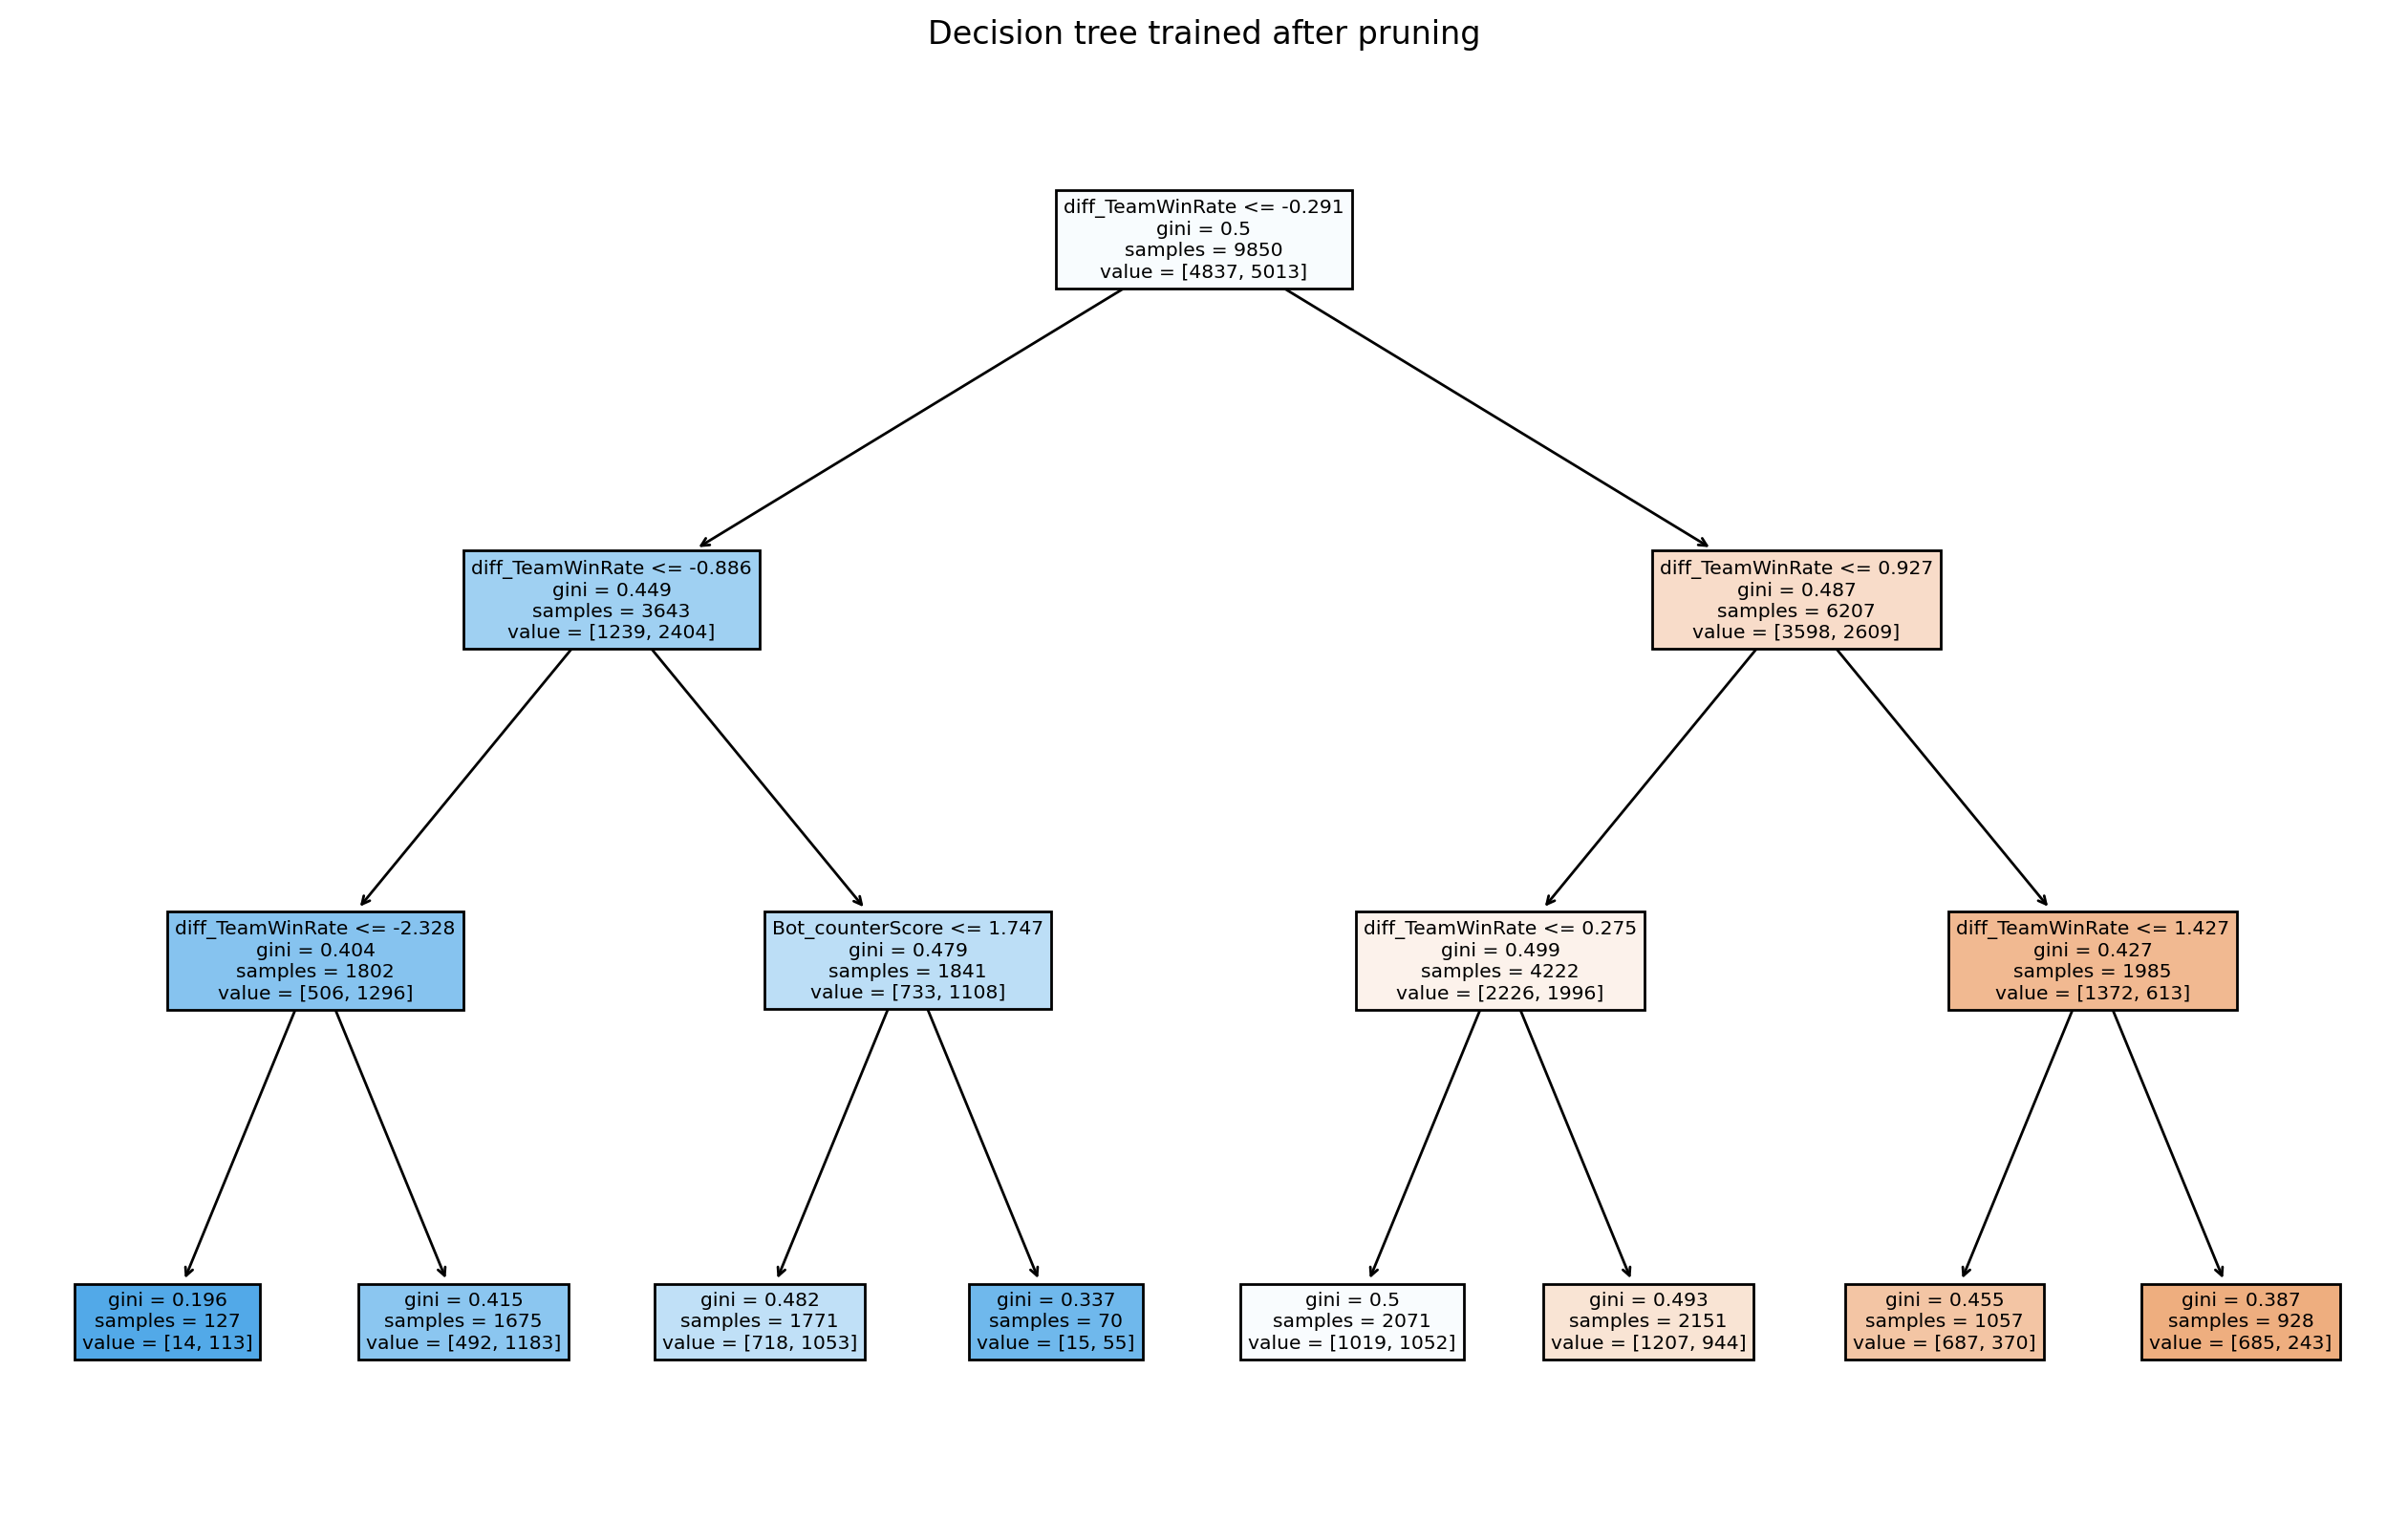

              precision    recall  f1-score   support

         100       0.56      0.64      0.60       239
         200       0.65      0.58      0.62       283

    accuracy                           0.61       522
   macro avg       0.61      0.61      0.61       522
weighted avg       0.61      0.61      0.61       522



<Figure size 432x288 with 0 Axes>

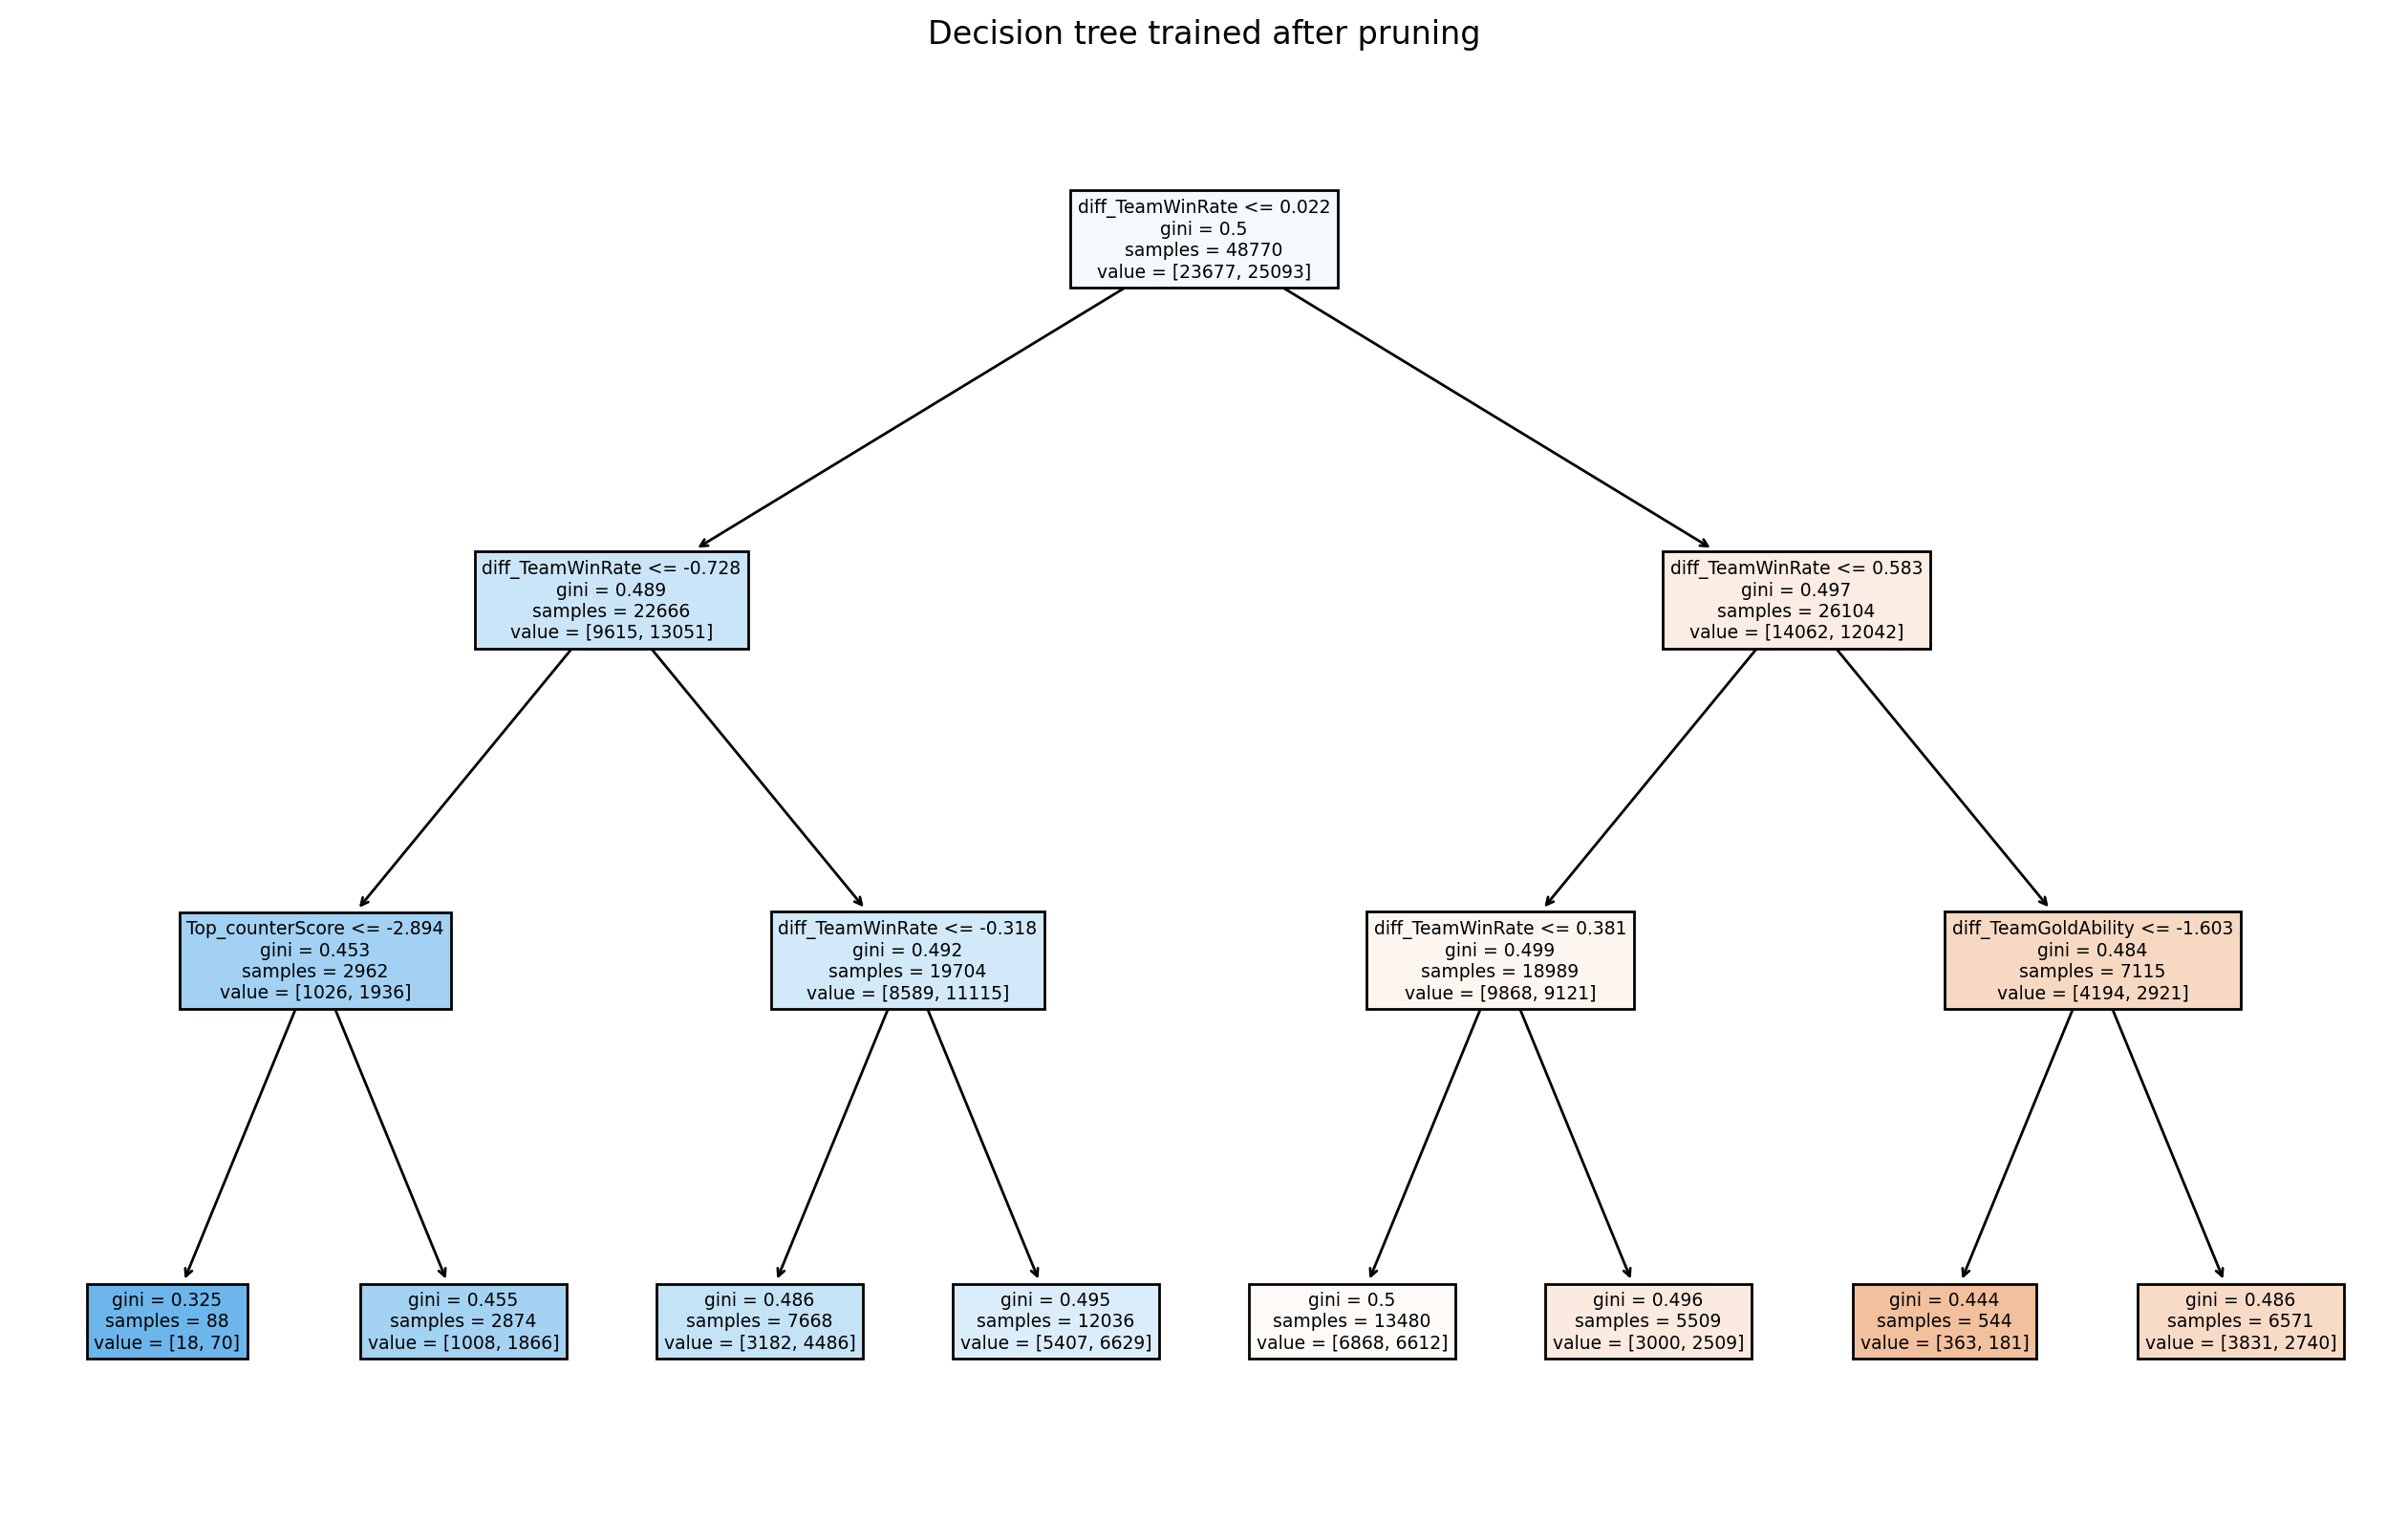

              precision    recall  f1-score   support

         100       0.58      0.52      0.55       239
         200       0.63      0.68      0.65       283

    accuracy                           0.61       522
   macro avg       0.60      0.60      0.60       522
weighted avg       0.61      0.61      0.61       522



<Figure size 432x288 with 0 Axes>

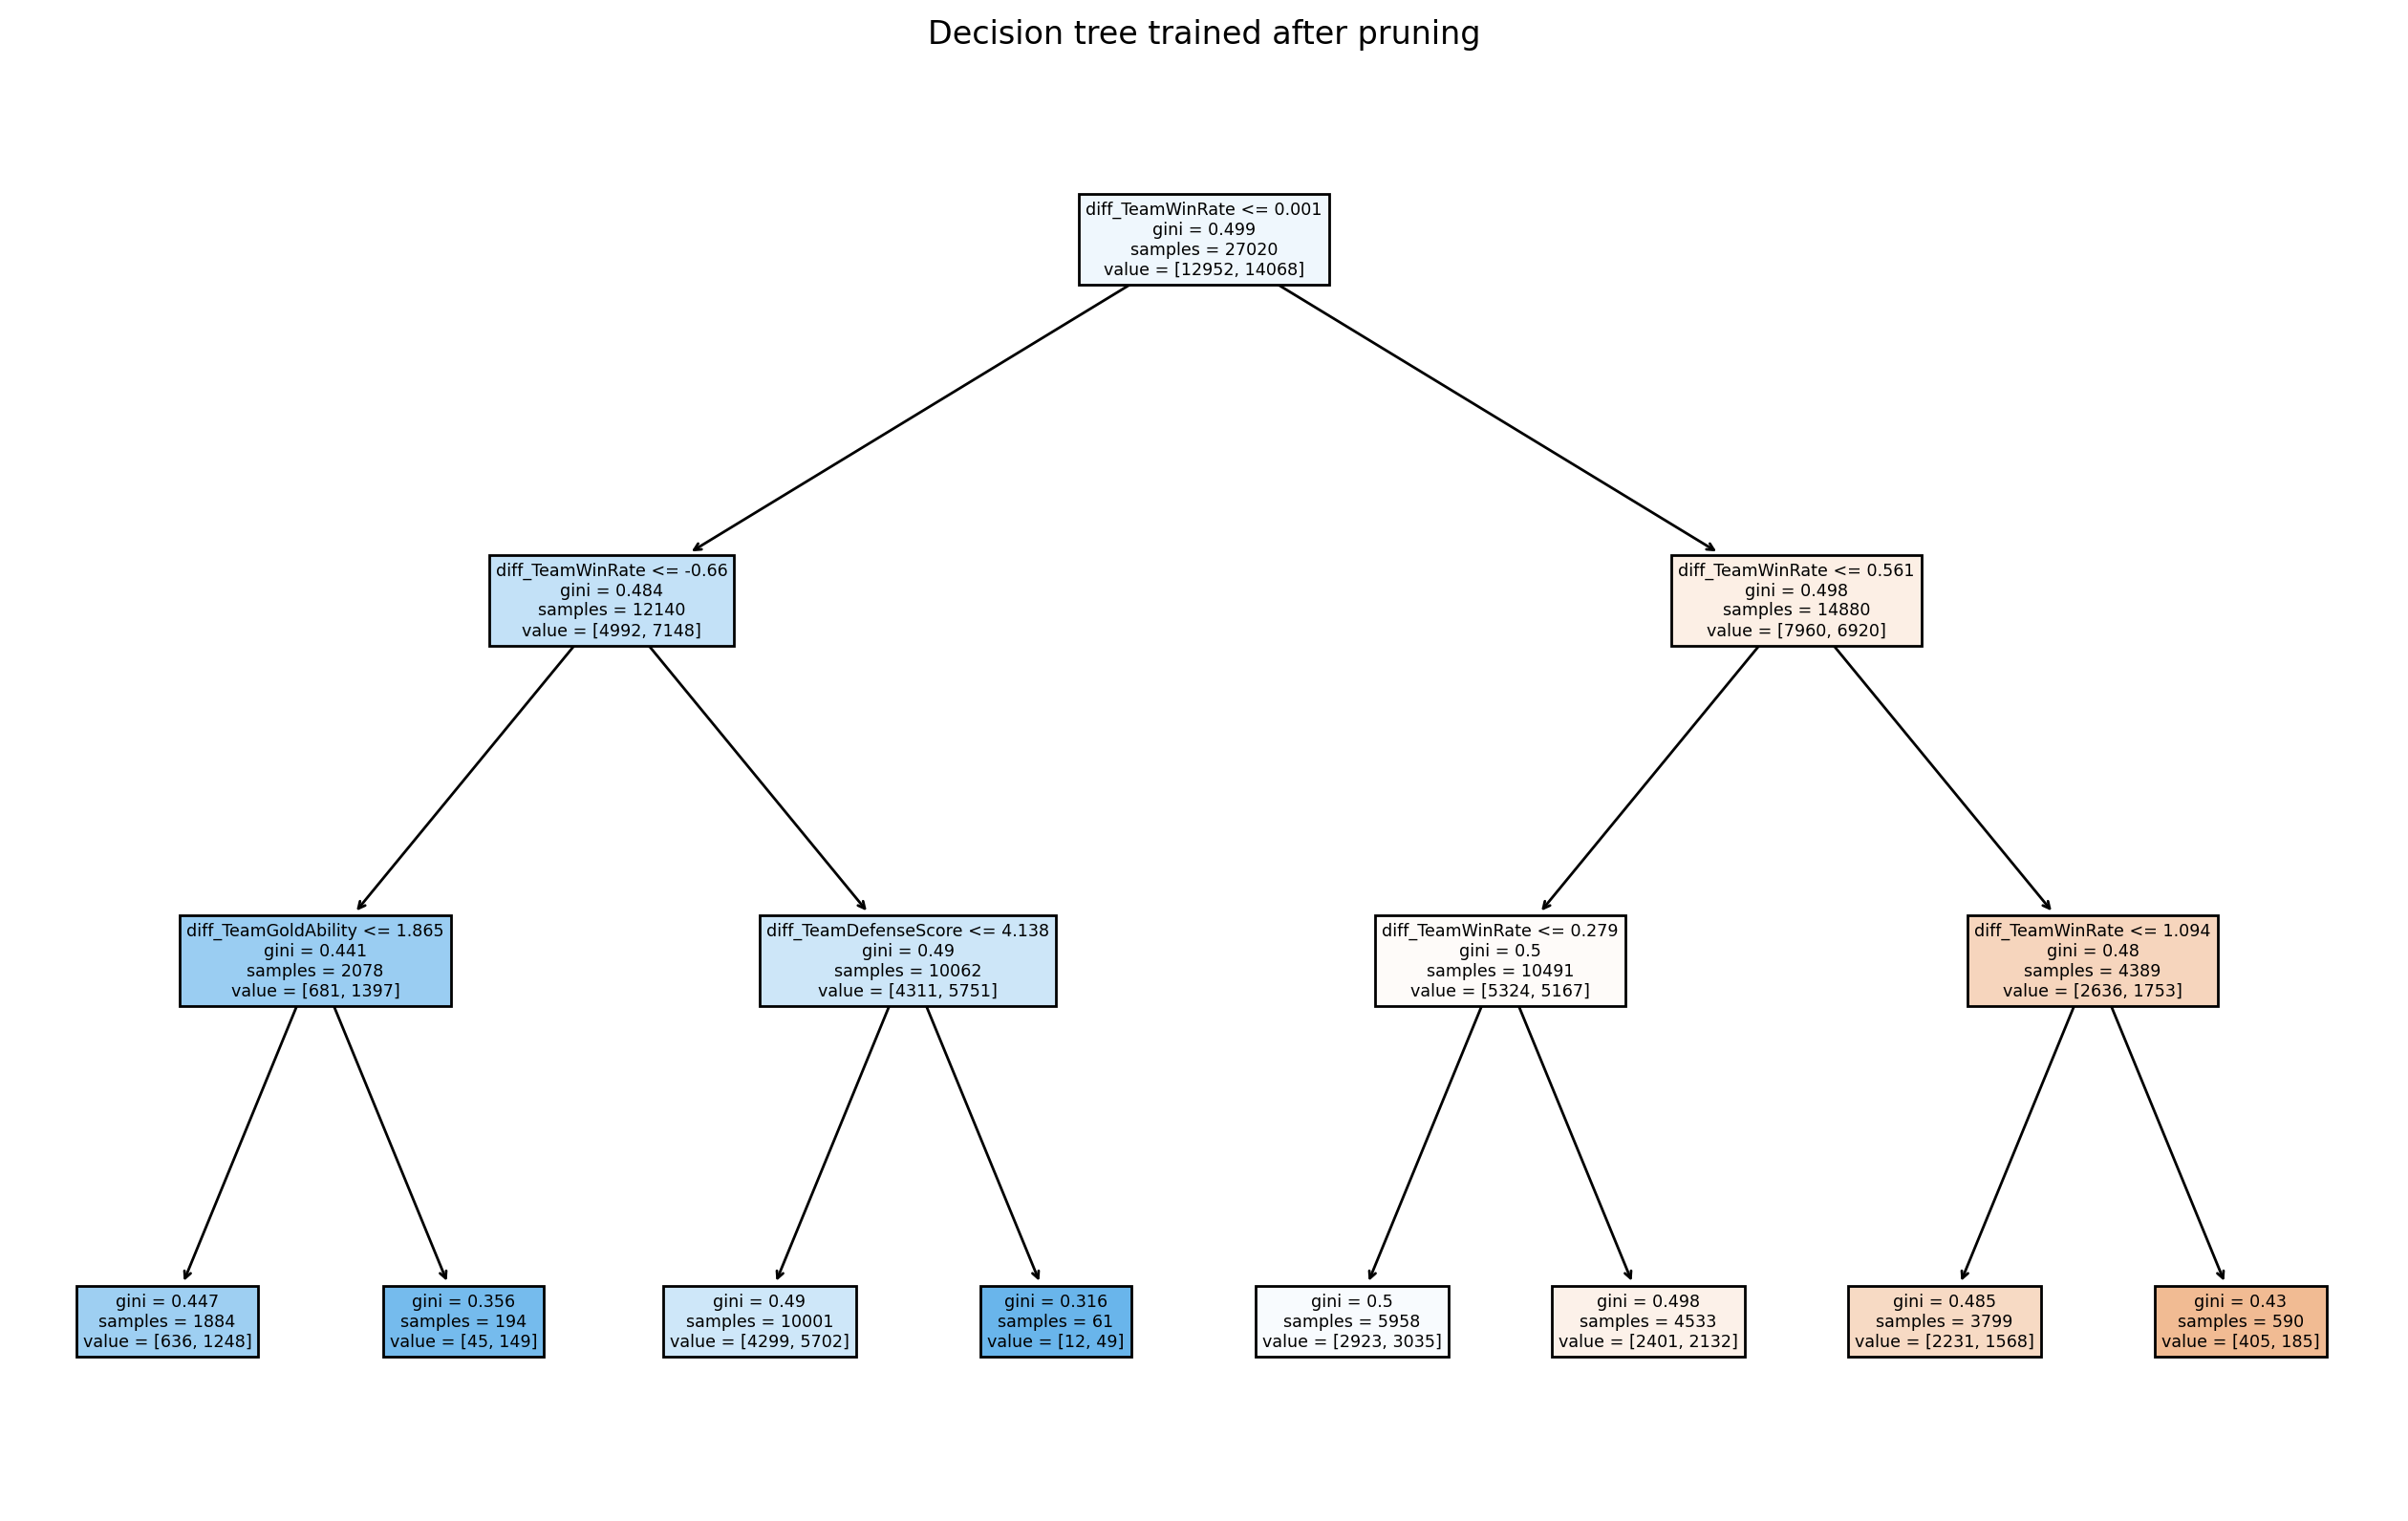

DecisionTreeClassifier(max_depth=3)

In [14]:
runModel(pre,pre_val,3)
runModel(mid,mid_val,3)
runModel(late,late_val,3)

In [ ]:
# runModel(pre_all,3)

In [ ]:
# #Grid Search
# X_train, Y_train = pre.drop(['TeamVictory'],axis=1),pre[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)


# param_grid = [
#         {
#             'n_estimators' : range(10,101,10),
#             'max_depth' : range(5,15),
#             'min_samples_leaf' : range(5,15),
            
#         }
#        ]

# clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y.values.ravel())


# print("Best parameters set found on development set:")
# print(clf.best_params_)

In [15]:
X_train, Y_train = pre.drop(['TeamVictory'],axis=1),pre[['TeamVictory']]
X_val,Y_val = pre_val.drop(['TeamVictory'],axis=1),pre_val[['TeamVictory']]
#Creating a copy of data
X_scale_train = X_train.copy()
X_scale_val = X_val.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(X_scale_train)
scaler.fit(X_scale_val)
X_scale_train = pd.DataFrame(scaler.transform(X_scale_train),columns= X_scale_train.columns )
X_scale_val = pd.DataFrame(scaler.transform(X_scale_val),columns= X_scale_val.columns )

In [16]:
RDF = RandomForestClassifier(max_depth=5, n_estimators=60)
RDF.fit(X_scale_train,Y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=60)

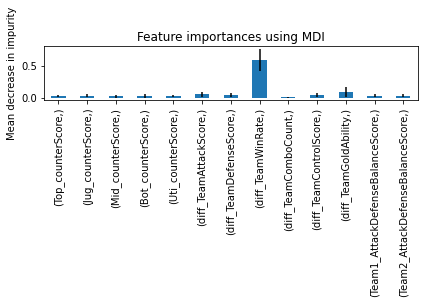

In [17]:
import time

feature_names = [X_scale_train.columns[range(0,13)]]
start_time = time.time()
importances = RDF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()